# PANDAS


## Importing pandas

**1.** Import pandas under the name `pd`.

In [16]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore") #to sto[ warnings

**2.** Print the version of pandas that has been imported.

In [3]:
pd.__version__

'1.3.4'

**3.** Print out all the version information of the libraries that are required by the pandas library.

In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19044
machine          : AMD64
processor        : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : 0.29.24
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: None
bs4              : 4.10.0
bottleneck       : 1.3.2


## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [5]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df=pd.DataFrame(data,index=labels)

In [6]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**5.** Display a summary of the basic information about this DataFrame and its data.

In [7]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [8]:
df[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [9]:
df[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [ ]:
df.iloc[[3,4,8],:2] 

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [10]:
df.loc[df["visits"]>3,:]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [11]:
df.loc[df["age"].isnull(),:]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [12]:
df[(df["animal"]=="cat")&(df["age"]<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [13]:
df[df["age"].between(2,4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [17]:
df["age"]["f"]=1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [18]:
df["visits"].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [19]:
df.groupby("animal")["age"].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [20]:
df.loc["k"]=[ "cow",8,3,"yes"]

In [21]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [22]:
df=df.drop("k")

In [23]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [24]:
df["animal"].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [25]:
df.sort_values(by=["age","visits"],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [26]:
df["priority"]=df["priority"].replace(["yes","no"],[True,False])

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [27]:
df["animal"]=df["animal"].replace("snake","python")

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [28]:
df.pivot_table(index="animal",columns="visits",values="age",aggfunc="mean")

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer


**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df

,A
0,1
1,2
2,2
3,3
4,4
5,5
6,5
7,5
8,6
9,7


In [ ]:
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [29]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df

,0,1,2
0,0.222506,0.551423,0.439369
1,0.590911,0.469106,0.492249
2,0.390778,0.751761,0.817096
3,0.962850,0.067747,0.532922
4,0.039030,0.459154,0.033687


In [30]:
df.sub(df.mean(axis=1),axis=0)

,0,1,2
0,-0.181927,0.146990,0.034937
1,0.073489,-0.048316,-0.025173
2,-0.262434,0.098549,0.163885
3,0.441677,-0.453426,0.011749
4,-0.138260,0.281863,-0.143603


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [31]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.895180,0.046704,0.865160,0.812734,0.157306,0.002063,0.974538,0.498538,0.349060,0.840916
1,0.908791,0.166033,0.141692,0.515690,0.748377,0.011776,0.074155,0.631524,0.637895,0.324108
2,0.038981,0.652230,0.137978,0.741548,0.609904,0.055699,0.755377,0.502365,0.457262,0.836301
3,0.867927,0.076834,0.347714,0.270373,0.664785,0.533423,0.017783,0.385425,0.399012,0.346226
4,0.781287,0.857779,0.975059,0.190211,0.208815,0.846185,0.560448,0.244917,0.032018,0.517724


In [32]:
df.sum(axis=0).idxmin()

'f'

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [33]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})


In [34]:
len(df.drop_duplicates(keep=False))

4

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [92]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [93]:
df1=df.groupby("grps")
df1["vals"].nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [94]:
a=np.arange(1,101,10)
a

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**1.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [ ]:
import datetime
a=pd.date_range("2015-01-01","2015-12-31",freq="B")
len_of_a=len(a)

In [ ]:
import random
s=np.random.rand(len_of_a)
S=pd.Series(s,index=a)
S

2015-01-01    0.084816
2015-01-02    0.144170
2015-01-05    0.280299
2015-01-06    0.904798
2015-01-07    0.438929
                ...   
2015-12-25    0.246612
2015-12-28    0.714255
2015-12-29    0.569600
2015-12-30    0.094571
2015-12-31    0.693350
Freq: B, Length: 261, dtype: float64

**2.** Find the sum of the values in `s` for every Wednesday.

In [ ]:
S[S.index.weekday==2].sum()

27.067951854169927

**3.** For each calendar month in `s`, find the mean of values.

In [ ]:
S.resample('M').mean()

2015-01-31    0.498442
2015-02-28    0.481344
2015-03-31    0.505982
2015-04-30    0.562863
2015-05-31    0.538501
2015-06-30    0.471989
2015-07-31    0.457713
2015-08-31    0.424950
2015-09-30    0.505743
2015-10-31    0.455958
2015-11-30    0.566639
2015-12-31    0.536034
Freq: M, dtype: float64

**4.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [ ]:
thu=S[(S.index.weekday==3)]
thu.index

DatetimeIndex(['2015-01-01', '2015-01-08', '2015-01-15', '2015-01-22',
               '2015-01-29', '2015-02-05', '2015-02-12', '2015-02-19',
               '2015-02-26', '2015-03-05', '2015-03-12', '2015-03-19',
               '2015-03-26', '2015-04-02', '2015-04-09', '2015-04-16',
               '2015-04-23', '2015-04-30', '2015-05-07', '2015-05-14',
               '2015-05-21', '2015-05-28', '2015-06-04', '2015-06-11',
               '2015-06-18', '2015-06-25', '2015-07-02', '2015-07-09',
               '2015-07-16', '2015-07-23', '2015-07-30', '2015-08-06',
               '2015-08-13', '2015-08-20', '2015-08-27', '2015-09-03',
               '2015-09-10', '2015-09-17', '2015-09-24', '2015-10-01',
               '2015-10-08', '2015-10-15', '2015-10-22', '2015-10-29',
               '2015-11-05', '2015-11-12', '2015-11-19', '2015-11-26',
               '2015-12-03', '2015-12-10', '2015-12-17', '2015-12-24',
               '2015-12-31'],
              dtype='datetime64[ns]', freq=None

In [ ]:
for i in thu.index:
  if i.day>=15 and i.day<=21:
    print(i)

2015-01-15 00:00:00
2015-02-19 00:00:00
2015-03-19 00:00:00
2015-04-16 00:00:00
2015-05-21 00:00:00
2015-06-18 00:00:00
2015-07-16 00:00:00
2015-08-20 00:00:00
2015-09-17 00:00:00
2015-10-15 00:00:00
2015-11-19 00:00:00
2015-12-17 00:00:00


## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


**1.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [66]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [67]:
df["FlightNumber"].isnull().sum()

2

In [68]:
type(df["FlightNumber"][0])

numpy.float64

In [69]:
for i in range(len(df["FlightNumber"])):
    if pd.isnull(df["FlightNumber"][i]):
        df["FlightNumber"][i]=df["FlightNumber"][i-1]+10

df["FlightNumber"]=df["FlightNumber"].astype("int64")

**2.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [70]:
from_and_to=df["From_To"].str.split("_",expand=True)
from_and_to.columns=['from',"to"]
from_and_to

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**3.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [80]:
for i in range(len(from_and_to["from"])):
    from_and_to["from"][i]=from_and_to["from"][i].capitalize()
    from_and_to["to"]=from_and_to["to"].str.capitalize()
    
from_and_to

,from,to
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


**4.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [81]:
df=df.drop(columns="From_To")

In [82]:
dff=pd.concat([df,from_and_to],axis=1)

In [83]:
dff

,FlightNumber,RecentDelays,Airline,from,to
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


**5**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [84]:
dff['Airline'] = dff['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

In [85]:
dff

,FlightNumber,RecentDelays,Airline,from,to
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


**5**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [86]:
df["RecentDelays"].isnull().sum()

0

In [87]:
delay=pd.DataFrame(dff["RecentDelays"].values.tolist())
delay

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [89]:
col=[]
for i in range(len(delay.columns)):
  col.append("delay"+str(i+1))
col

['delay1', 'delay2', 'delay3']

In [90]:
delay.columns=col

In [91]:
delay

,delay1,delay2,delay3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**1**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [57]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)

In [58]:
mi

MultiIndex([('A', 0),
            ('A', 1),
            ('A', 2),
            ('A', 3),
            ('A', 4),
            ('A', 5),
            ('A', 6),
            ('A', 7),
            ('A', 8),
            ('A', 9),
            ('B', 0),
            ('B', 1),
            ('B', 2),
            ('B', 3),
            ('B', 4),
            ('B', 5),
            ('B', 6),
            ('B', 7),
            ('B', 8),
            ('B', 9),
            ('C', 0),
            ('C', 1),
            ('C', 2),
            ('C', 3),
            ('C', 4),
            ('C', 5),
            ('C', 6),
            ('C', 7),
            ('C', 8),
            ('C', 9)],
           )

In [59]:
s

A  0    0.251509
   1    0.778200
   2    0.564430
   3    0.772677
   4    0.995474
   5    0.751991
   6    0.742739
   7    0.632281
   8    0.946751
   9    0.293927
B  0    0.724929
   1    0.570782
   2    0.826888
   3    0.257385
   4    0.905595
   5    0.796517
   6    0.344061
   7    0.705094
   8    0.433687
   9    0.216286
C  0    0.938882
   1    0.708097
   2    0.051991
   3    0.056052
   4    0.629482
   5    0.796609
   6    0.692080
   7    0.997593
   8    0.919068
   9    0.896597
dtype: float64

**2.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [60]:
s.index.is_lexsorted()

True

**3**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [61]:
s.loc[:, [1, 3, 6]]

A  1    0.778200
   3    0.772677
   6    0.742739
B  1    0.570782
   3    0.257385
   6    0.344061
C  1    0.708097
   3    0.056052
   6    0.692080
dtype: float64

**4**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [62]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.751991
   6    0.742739
   7    0.632281
   8    0.946751
   9    0.293927
B  5    0.796517
   6    0.344061
   7    0.705094
   8    0.433687
   9    0.216286
dtype: float64

**5**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [63]:
s.sum(level=0)

A    6.729979
B    5.781224
C    6.686450
dtype: float64

**6**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [64]:
s.unstack().sum(axis=0)

0    1.915319
1    2.057078
2    1.443310
3    1.086114
4    2.530551
5    2.345117
6    1.778881
7    2.334968
8    2.299506
9    1.406810
dtype: float64

**7**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [65]:
s.swaplevel(0, 1)

0  A    0.251509
1  A    0.778200
2  A    0.564430
3  A    0.772677
4  A    0.995474
5  A    0.751991
6  A    0.742739
7  A    0.632281
8  A    0.946751
9  A    0.293927
0  B    0.724929
1  B    0.570782
2  B    0.826888
3  B    0.257385
4  B    0.905595
5  B    0.796517
6  B    0.344061
7  B    0.705094
8  B    0.433687
9  B    0.216286
0  C    0.938882
1  C    0.708097
2  C    0.051991
3  C    0.056052
4  C    0.629482
5  C    0.796609
6  C    0.692080
7  C    0.997593
8  C    0.919068
9  C    0.896597
dtype: float64

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**1.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.express as ps

In [ ]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


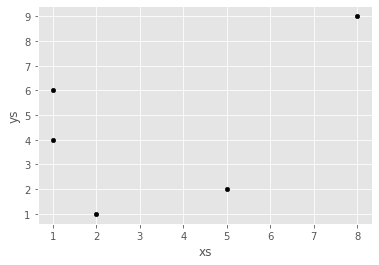

In [ ]:
df.plot.scatter("xs","ys",color="black")

**2.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

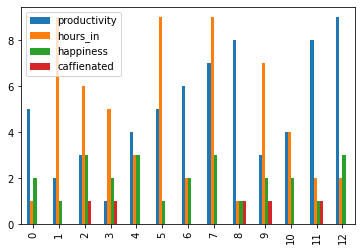

In [54]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df.plot(kind="bar");

**3.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [55]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

(-1.0, 12.0)

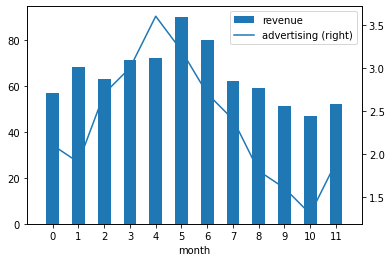

In [56]:
ax = df.plot.bar("month", "revenue",)
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))